In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [ ]:
# Import imdb

from tensorflow.keras.datasets import imdb

In [ ]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [ ]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [ ]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [ ]:
# Display the first dataset element input
# Notice encoding

x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults

(x_train, y_train), (x_test, y_test) = imdb.load_data()

# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)

In [ ]:
# Ignore the top 10 most frequent words using skip_top

(x_train, y_train), (x_test, y_test) = imdb.load_data(skip_top=10)

In [ ]:
# Limit the sequence lengths to 500 using maxlen

(x_train, y_train), (x_test, y_test) = imdb.load_data(maxlen=500)

In [ ]:
# Use '1' as the character that indicates the start of a sequence

(x_train, y_train), (x_test, y_test) = imdb.load_data(start_char=1)

#### Explore the dataset word index

In [ ]:
# Load the imdb word index using get_word_index()

word_index = imdb.get_word_index()

In [ ]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3

word_index = {key: value + index_from for key, value in word_index.items()}

In [ ]:
# Retrieve a specific word's index

word_index['the']

4

In [ ]:
index_to_words = {value:key for key, value in word_index.items()}

In [ ]:
index_to_words[4]

'the'

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [ ]:
# View an input sentence

[index_to_words[i] for i in x_train[0] if i > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [ ]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [ ]:
# Load the imdb data set

(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [ ]:
# Inspect the input data shape

x_train.shape

(25000,)

In [ ]:
# Pad the inputs to the maximum length using maxlen

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_x_train = pad_sequences(x_train, maxlen=300, padding='post')

In [ ]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [ ]:
# Import numpy 

import numpy as np

In [ ]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

tf_x_train = np.expand_dims(padded_x_train, axis=-1)
tf_x_train.shape

(25000, 300, 1)

In [ ]:
# Create a Masking layer 

from tensorflow.keras.layers import Masking

mask_layer = Masking()

In [ ]:
# Pass tf_x_train to it

tf_x_train = tf.convert_to_tensor(tf_x_train, dtype=tf.float32)
masked_x_train = mask_layer(tf_x_train)

In [ ]:
# Look at the dataset

masked_x_train

<tf.Tensor: id=8, shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [ ]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: id=9, shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [ ]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

from tensorflow.keras.layers import Embedding

In [ ]:
embed_layer = Embedding(input_dim=501, output_dim=16)

In [ ]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

inputs = tf.constant([ [ [0], [14], [100], [500] ] ])
outputs = embed_layer(inputs)
outputs

<tf.Tensor: id=15, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.00348166, -0.04771017, -0.0288251 , -0.00696202,
          -0.02876798, -0.00892473,  0.01659984,  0.04606689,
           0.00845169, -0.00052576, -0.03147586, -0.01345273,
           0.01400073,  0.03117773,  0.04734323,  0.01954024]],

        [[-0.02854517,  0.04103227,  0.03753651,  0.02023065,
          -0.01891484,  0.03071377, -0.00163009,  0.02710844,
          -0.03237577,  0.02610513, -0.03131955,  0.03395129,
           0.04171641, -0.02628145,  0.00626458, -0.02488391]],

        [[-0.047344  ,  0.02898176,  0.02796913, -0.00237353,
          -0.00307368,  0.04993144,  0.04635989, -0.00051326,
           0.03803111, -0.00126033,  0.04188858,  0.02357766,
          -0.04063081,  0.03306725,  0.00280736, -0.04434803]],

        [[ 0.01457207,  0.02462575, -0.04269454,  0.03760116,
          -0.00055625,  0.01252497,  0.00933867,  0.00365084,
          -0.0254539 ,  0.02570016,  0.02049223, -0.02863338,

In [ ]:
# Inspect the Embedding layer weights using get_weights()

(embed_layer.get_weights()[0].shape)

(501, 16)

In [ ]:
# Get the embedding for the 14th index

embed_layer.get_weights()[0][14]

array([-0.02854517,  0.04103227,  0.03753651,  0.02023065, -0.01891484,
        0.03071377, -0.00163009,  0.02710844, -0.03237577,  0.02610513,
       -0.03131955,  0.03395129,  0.04171641, -0.02628145,  0.00626458,
       -0.02488391], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [ ]:
# Create a layer that uses the mask_zero kwarg

masked_embed_layer = Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [ ]:
# Apply this layer to the sequence and see the _keras_mask property

masked_output = masked_embed_layer(inputs)

In [ ]:
masked_output._keras_mask

<tf.Tensor: id=36, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index

word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index['the']

3

In [ ]:
# Swap the keys and values of the word index

index_word = {value: key for key, value in word_index.items()}

In [ ]:
index_word[4]

'and'

In [ ]:
# View the first dataset example sentence

[index_word[i] for i in x_train[100] if i>2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

In [ ]:
y_train[100]

0

#### Build an Embedding layer into a model

In [ ]:
# Get the maximum token value

max_token_value = max(word_index.values())

In [ ]:
max_token_value

10000

In [ ]:
x_train.shape

(25000, 2494)

In [ ]:
x_test.shape

(25000, 2315)

In [ ]:
# Specify an embedding dimension

embedding_dim = 16

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, GlobalAveragePooling1D

In [ ]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = Sequential([
    Embedding(input_dim=max_token_value+1, output_dim=embedding_dim, mask_zero=False),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Functional API refresher: use the Model to build the same model

inputs = Input(shape=(None,))
embed = Embedding(input_dim=max_token_value+1, output_dim=embedding_dim, mask_zero=False)(inputs)
global_average_pool = GlobalAveragePooling1D()(embed)
fc = Dense(1, activation='sigmoid')(global_average_pool)
model = Model(inputs=inputs, outputs=fc)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [ ]:
# Compile the model with a binary cross-entropy loss

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6926 - accuracy: 0.5352 - val_loss: 0.6917 - val_accuracy: 0.5341
Epoch 2/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.6904 - accuracy: 0.5714 - val_loss: 0.6886 - val_accuracy: 0.6086
Epoch 3/5
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.6858 - accuracy: 0.6392 - val_loss: 0.6824 - val_accuracy: 0.7171
Epoch 4/5
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.6776 - accuracy: 0.6906 - val_loss: 0.6723 - val_accuracy: 0.7332
Epoch 5/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.6655 - accuracy: 0.7176 - val_loss: 0.6587 - val_accuracy: 0.6967


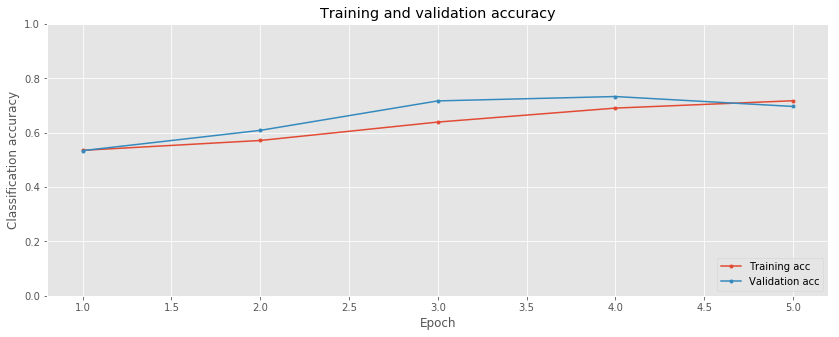

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [ ]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [ ]:
weights.shape

(10001, 16)

In [ ]:
!ls

'Coding Tutorial.ipynb'


In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [ ]:
# Create a SimpleRNN layer and test it

from tensorflow.keras.layers import SimpleRNN

rnn_layer = SimpleRNN(16)

In [ ]:
# Note that only the final cell output is returned

dummy_data = tf.constant([[[1.,1.],[2.,2.],[56.,-100.]]])
print(dummy_data.shape)

rnn_output = rnn_layer(dummy_data)
rnn_output

(1, 3, 2)


<tf.Tensor: id=151, shape=(1, 16), dtype=float32, numpy=
array([[-1.        ,  1.        , -1.        , -1.        ,  1.        ,
        -1.        , -1.        , -1.        ,  1.        , -1.        ,
         0.99972844, -1.        ,  1.        ,  1.        , -0.9993381 ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()

word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index['the']

3

#### Create a recurrent neural network model

In [ ]:
# Get the maximum index value

max_token_value = max(word_index.values())
max_token_value

10000

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, GlobalAveragePooling1D, LSTM

In [ ]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = Sequential([
    Embedding(max_token_value+1, 16, mask_zero=True),
    LSTM(16),
    Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [ ]:
# Compile the model with binary cross-entropy loss

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 641s 26ms/sample - loss: 0.4056 - accuracy: 0.8140
Epoch 2/5
25000/25000 [==============================] - 554s 22ms/sample - loss: 0.2231 - accuracy: 0.9168
Epoch 3/5
25000/25000 [==============================] - 522s 21ms/sample - loss: 0.1749 - accuracy: 0.9374
Epoch 4/5
25000/25000 [==============================] - 484s 19ms/sample - loss: 0.1421 - accuracy: 0.9506
Epoch 5/5
  480/25000 [..............................] - ETA: 7:54 - loss: 0.1146 - accuracy: 0.9583

#### Plot learning curves

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [17]:
# View the first test data example sentence
# (invert the word index)

index_word = {value: key for key, value in word_index.items()}
[index_word[i] for i in x_test[0] if i > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [20]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

array([[0.07165357]], dtype=float32)

In [19]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [4]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

In [5]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [6]:
# Get the word index using get_imdb_word_index()

word_index = get_imdb_word_index(num_words=5000)

1646592/1641221 [==============================] - 0s 0us/step


#### Build stacked and bidirectional recurrent models

In [7]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(word_index.values())
max_index_value

5000

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, GRU

In [9]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = Sequential([
                    Embedding(max_index_value+1, 16, mask_zero=True),
                    LSTM(32, return_sequences=True),
                    LSTM(32),
                    Dense(1, activation='sigmoid')
])

In [10]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = Sequential([
                    Embedding(max_index_value+1, 16, mask_zero=True),
                    Bidirectional(LSTM(32), merge_mode='sum'),
                    Dense(1, activation='sigmoid')
])

In [12]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = Sequential([
                    Embedding(max_index_value+1, 16, mask_zero=True),
                    Bidirectional(LSTM(8, return_sequences=True)),
                    GRU(8),
                    Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [13]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 827s 2s/step - loss: 0.4251 - accuracy: 0.7964
Epoch 2/3
536/536 [==============================] - 823s 2s/step - loss: 0.2390 - accuracy: 0.9099
Epoch 3/3
536/536 [==============================] - 818s 2s/step - loss: 0.1780 - accuracy: 0.9355


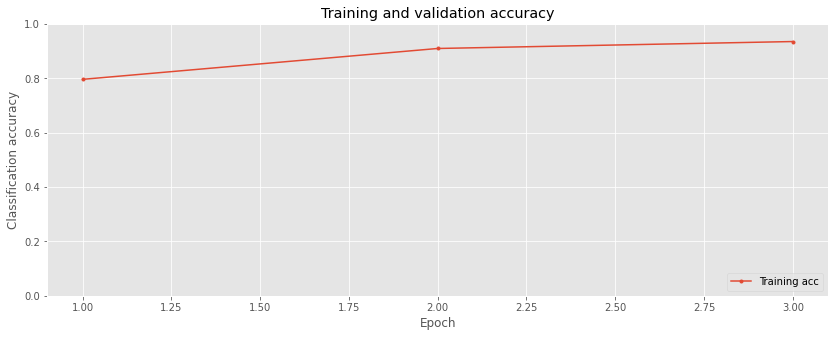

In [16]:
## Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
#val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
#plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);